### NOTEBOOK CONTENTS

    -mean monthly maps of CO2 air-sea flux for preindustrial (PI)
    and present-day (BR) run
    -line plot of monthly means by region

### Leading questions:

#### When in the year do we switch from ingassing (positive numbers) to outgassing (CO2 out of system, negative numbers)?

#### Which regions are important?


In [84]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [85]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [86]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait


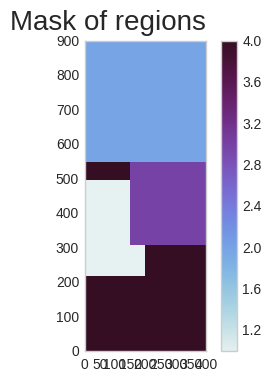

In [87]:
reg_names = ['Juan de Fuca', 'N. Strait', 'C. Strait', 'Haro Strait']
colours = ['black','orange','green', 'fuchsia']


mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('Mask of regions',fontsize=20)
surfmask = mask[0,:,:]
print('1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait')

## SURFACE CO2 flux - present-day (BR)

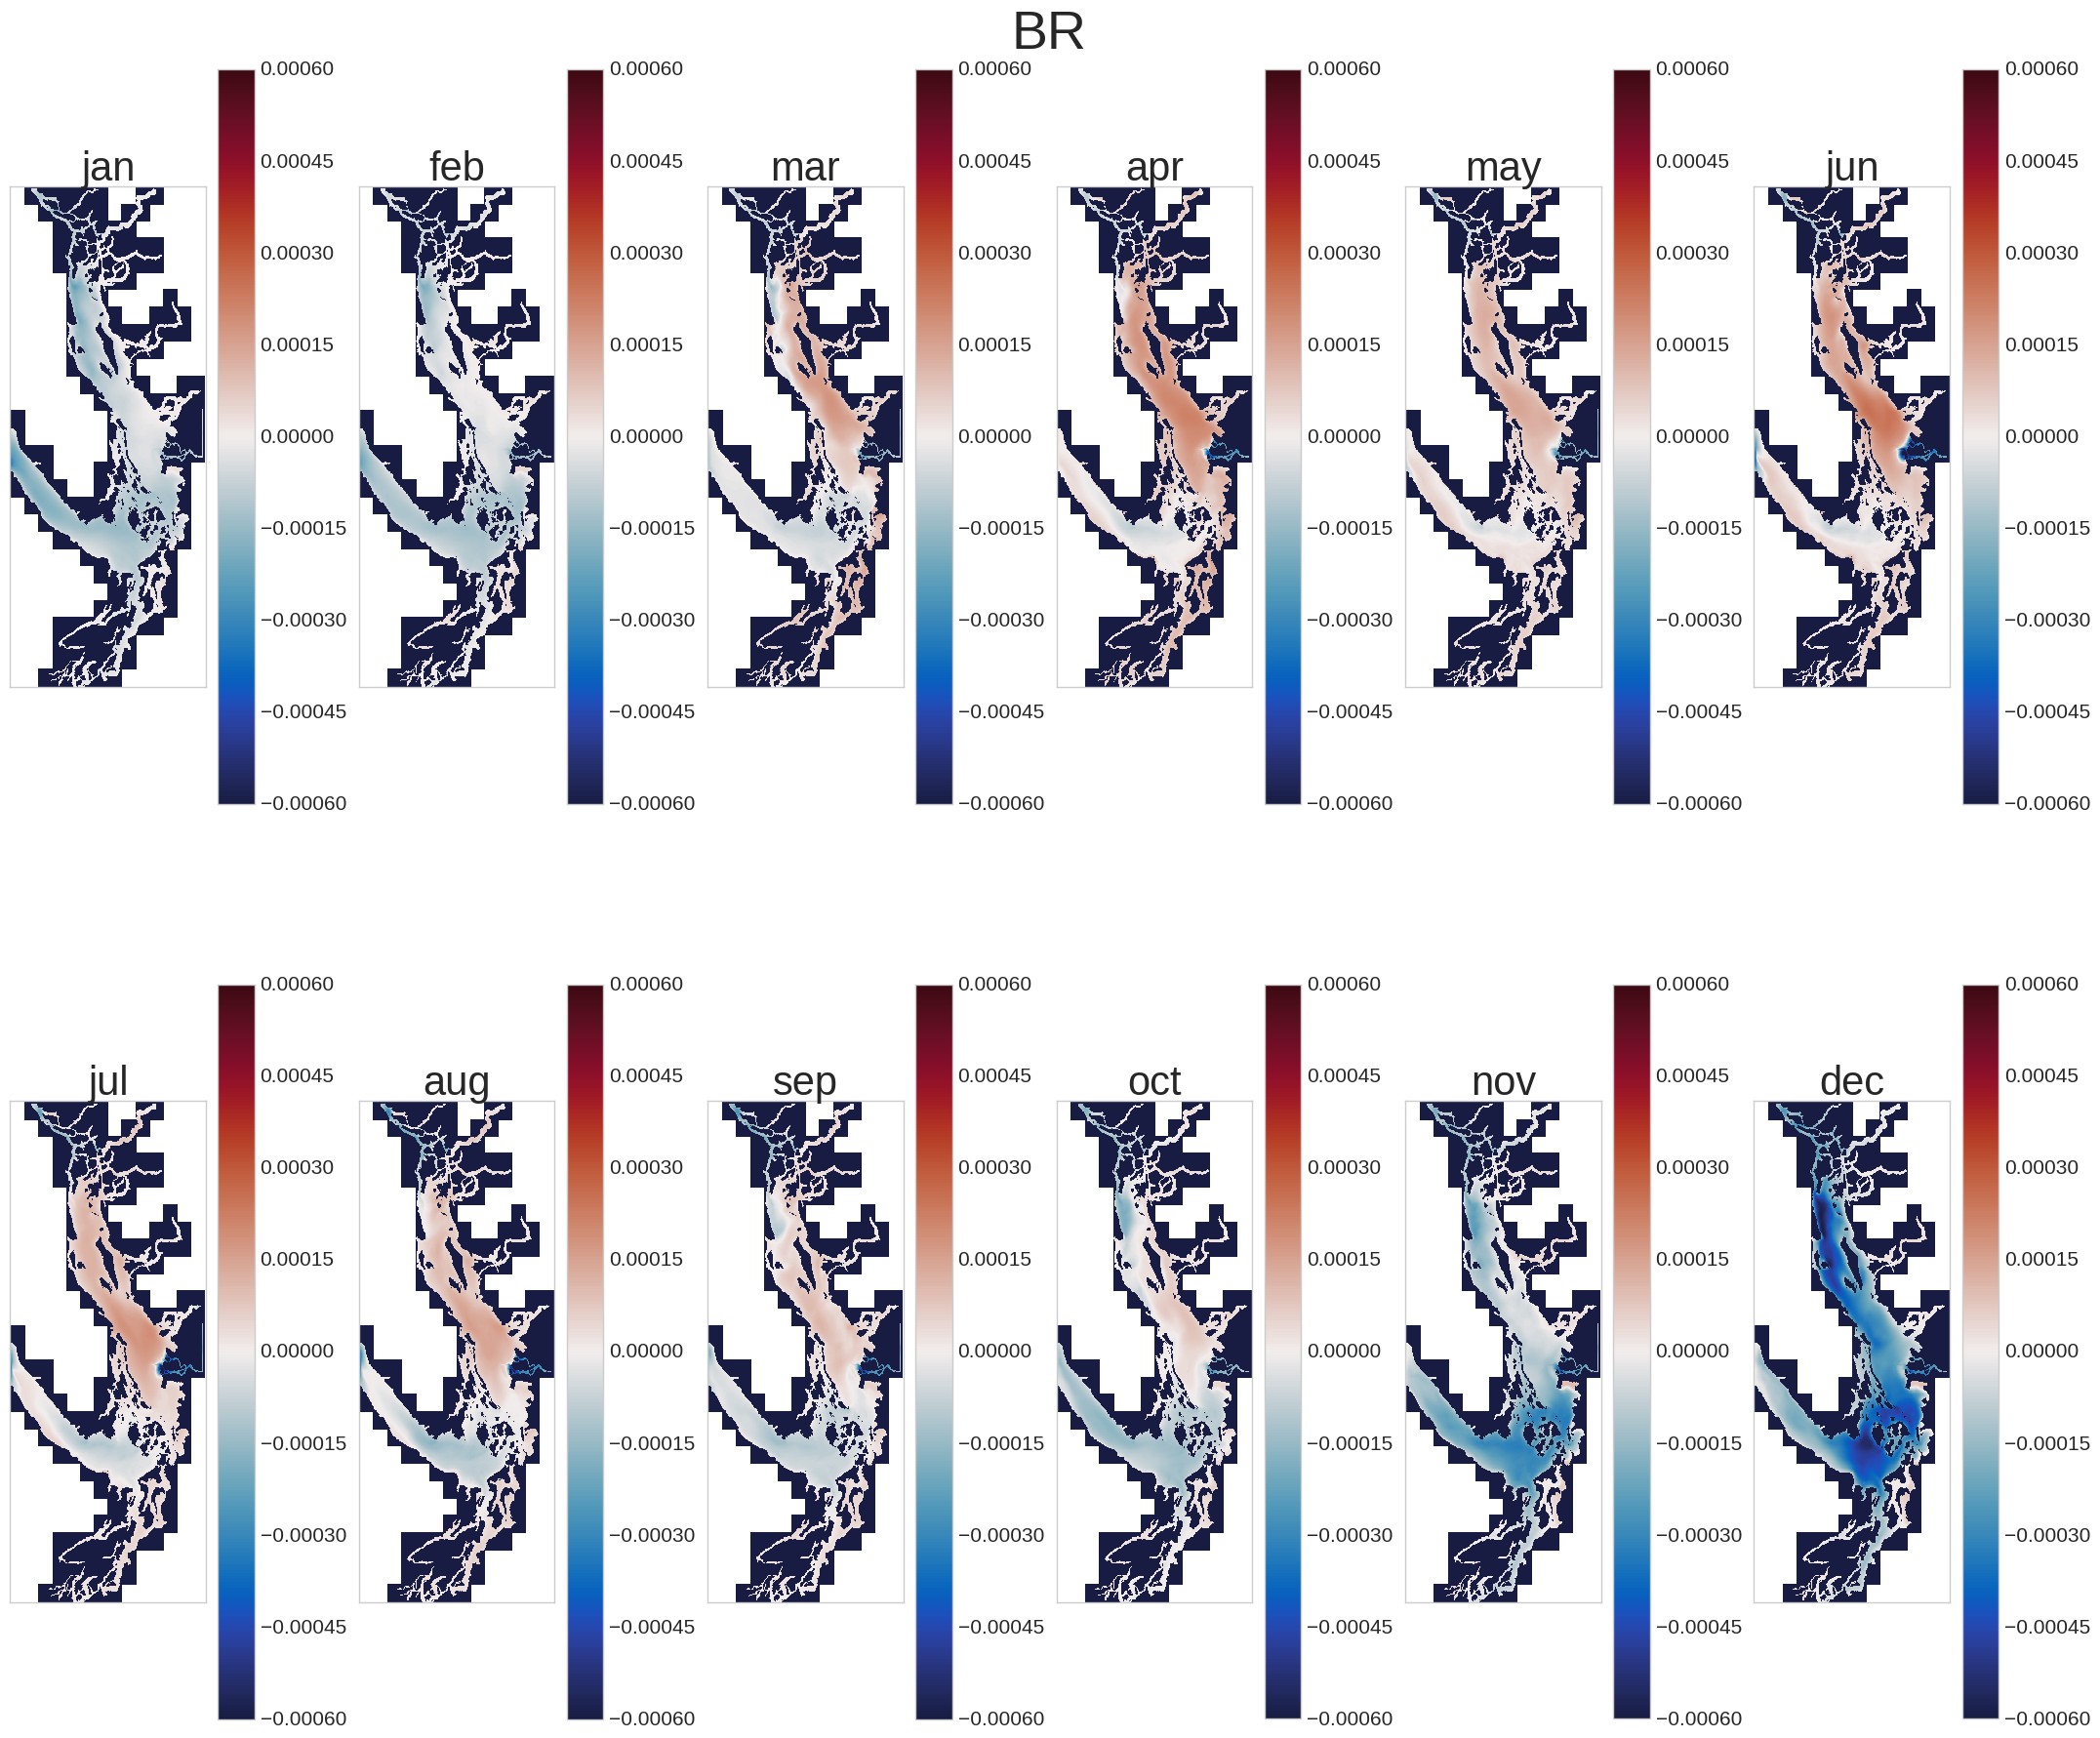

In [88]:
tvmin = -0.0006
tvmax = 0.0006

fact = 1.8
mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
avgs_BR = np.zeros([4,12])
std_devs_BR = np.zeros([4,12])
avgs_PI = np.zeros([4,12])
std_devs_PI = np.zeros([4,12])

fig = plt.figure(figsize=(12*fact,10.5*fact))
for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    BR_dat = tnc_BR['co2_flux_mmol_m2_s'][0,:,:]
    PI_dat = tnc_PI['co2_flux_mmol_m2_s'][0,:,:]
    tplt = BR_dat
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin = tvmin, vmax = tvmax)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    BR_dat[BR_dat == 0] = np.nan
    PI_dat[PI_dat == 0] = np.nan
    for r in range(1,5):
        regBR = BR_dat[surfmask == r]
        regPI = PI_dat[surfmask == r] 
        avgs_BR[r-1,i-1] = np.nanmean(regBR)
        avgs_PI[r-1,i-1] = np.nanmean(regPI)
        std_devs_BR[r-1,i-1] = np.nanstd(regBR)
        std_devs_PI[r-1,i-1] = np.nanstd(regPI)    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
plt.suptitle('BR', fontsize =40)
plt.tight_layout()







## SURFACE CO2 flux - preindustrial (PI)

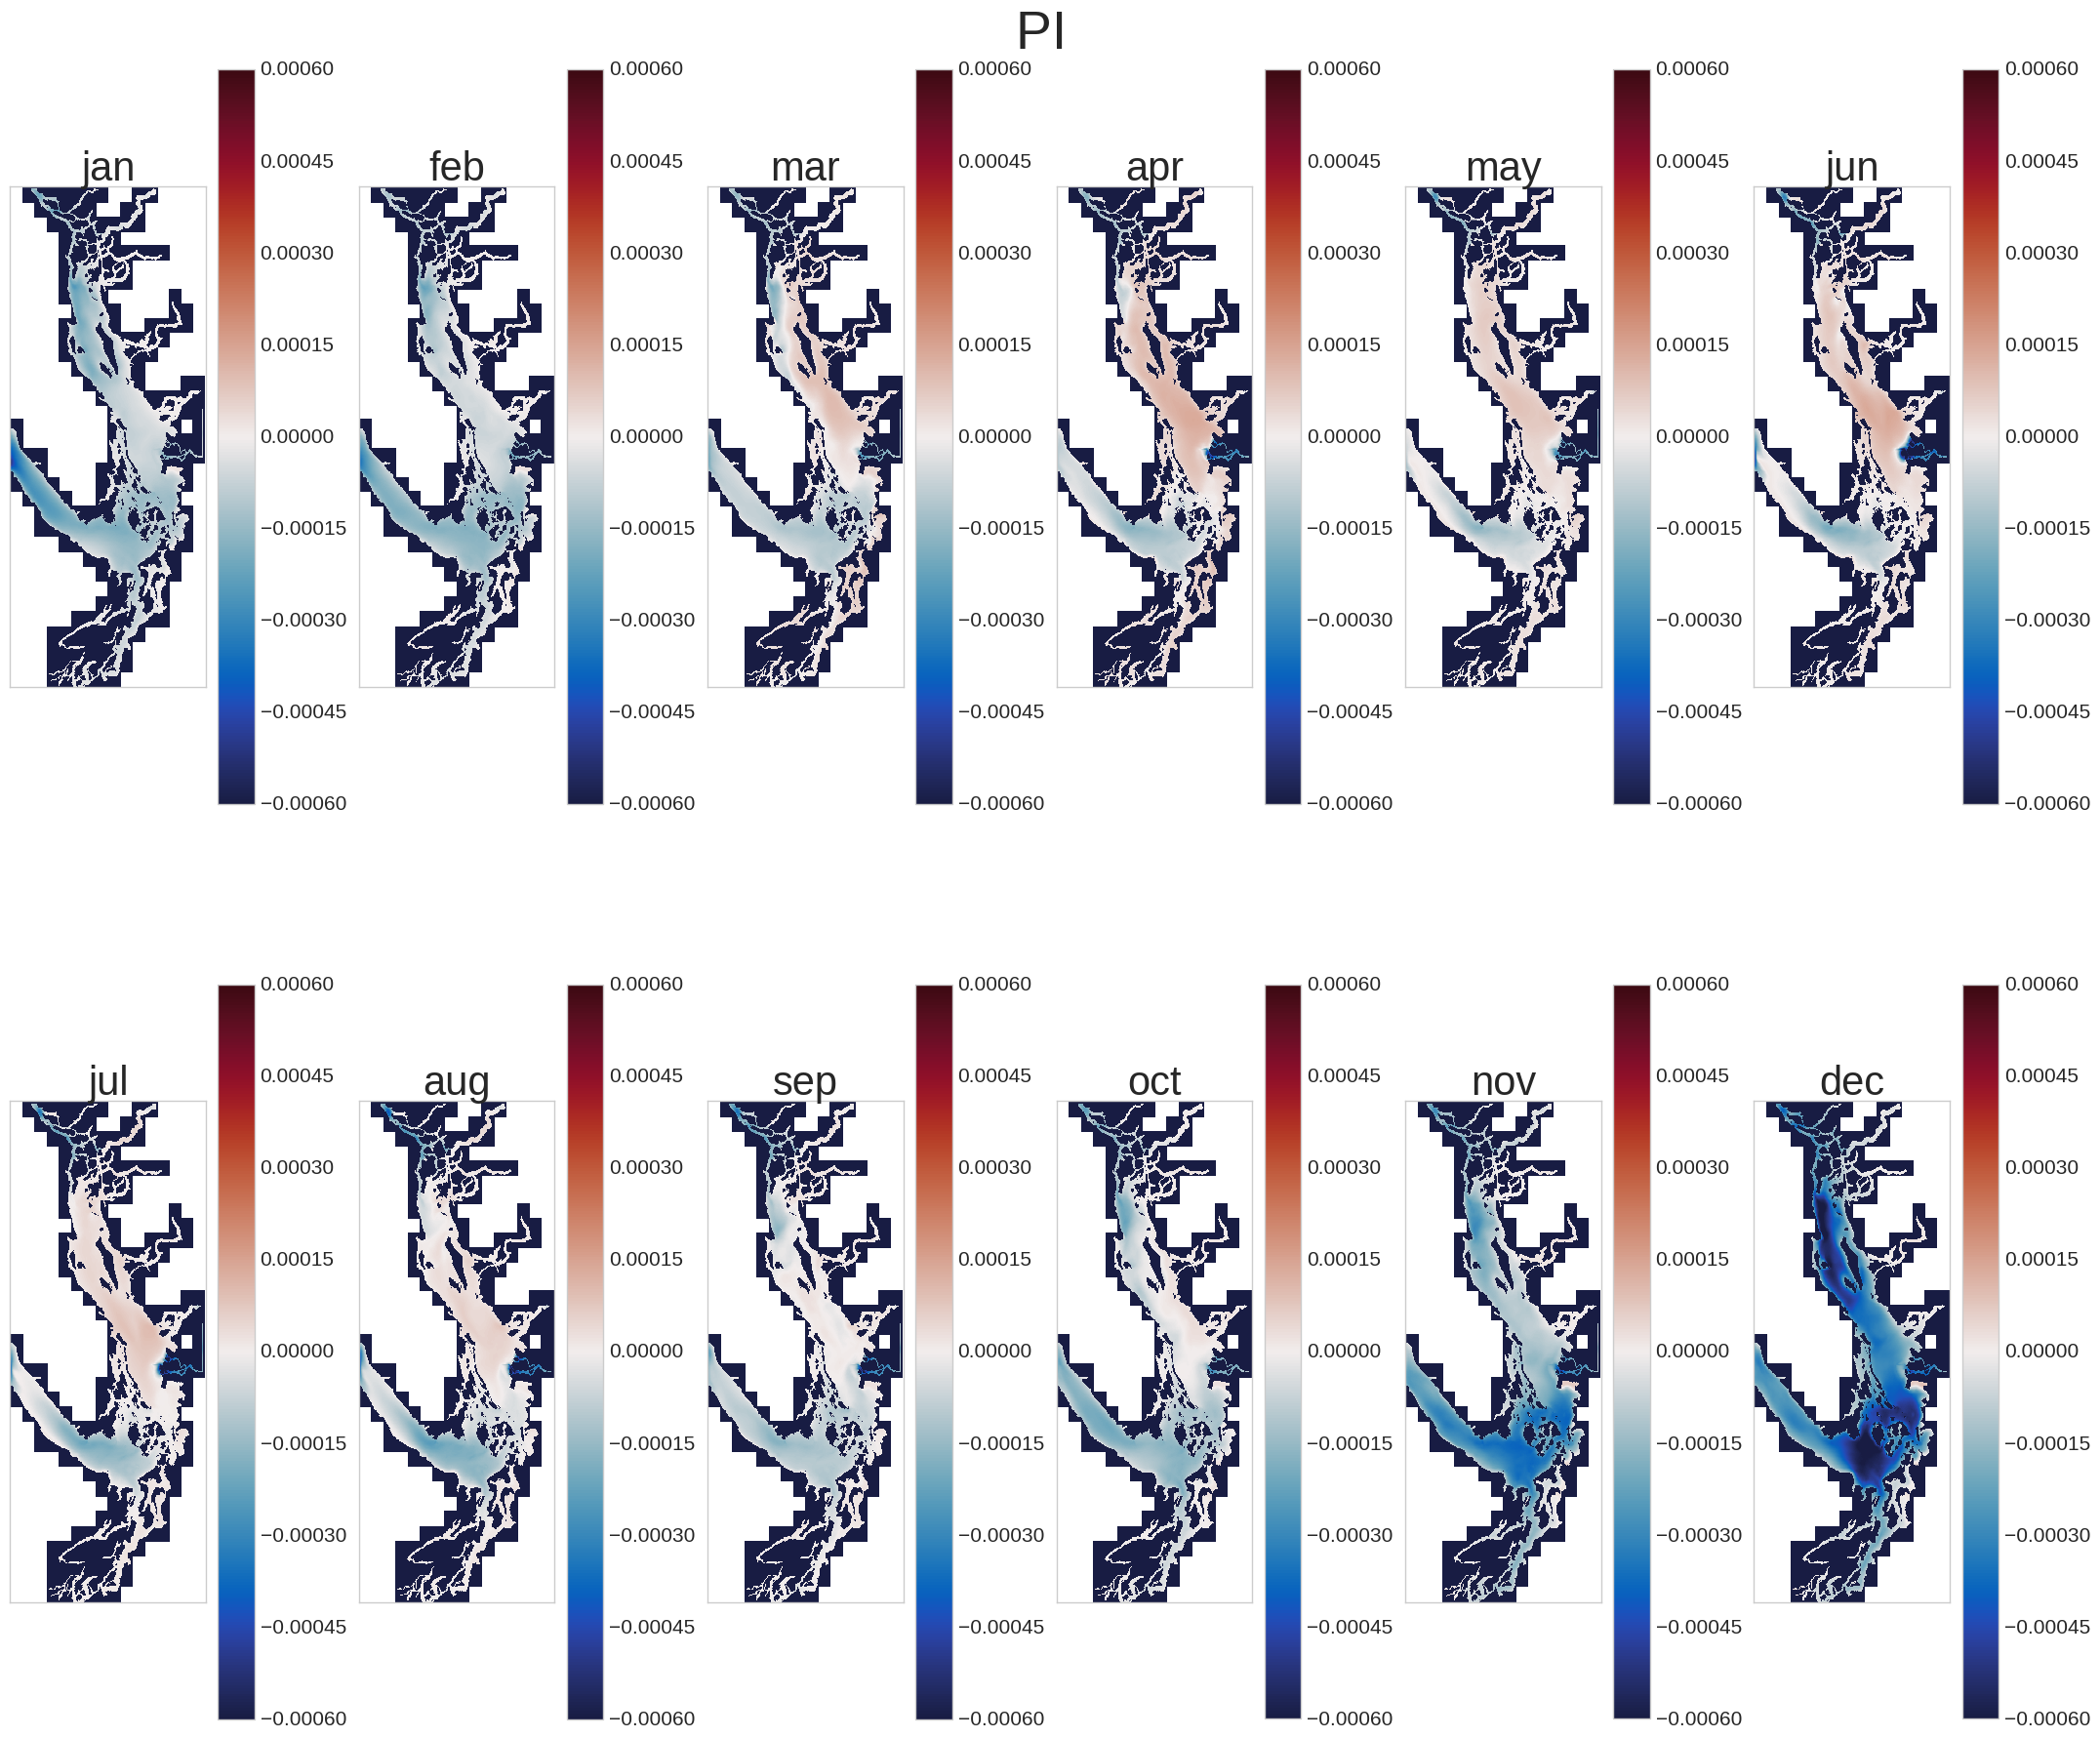

In [89]:
fig = plt.figure(figsize=(12*fact,10.5*fact))
for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    BR_dat = tnc_BR['co2_flux_mmol_m2_s'][0,:,:]
    PI_dat = tnc_PI['co2_flux_mmol_m2_s'][0,:,:]
    tplt = PI_dat
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin = tvmin, vmax = tvmax)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    BR_dat[BR_dat == 0] = np.nan
    PI_dat[PI_dat == 0] = np.nan 
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
plt.suptitle('PI ', fontsize =40)
plt.tight_layout()



## BR - PI difference plot ('how much more does PI run outgas'?)

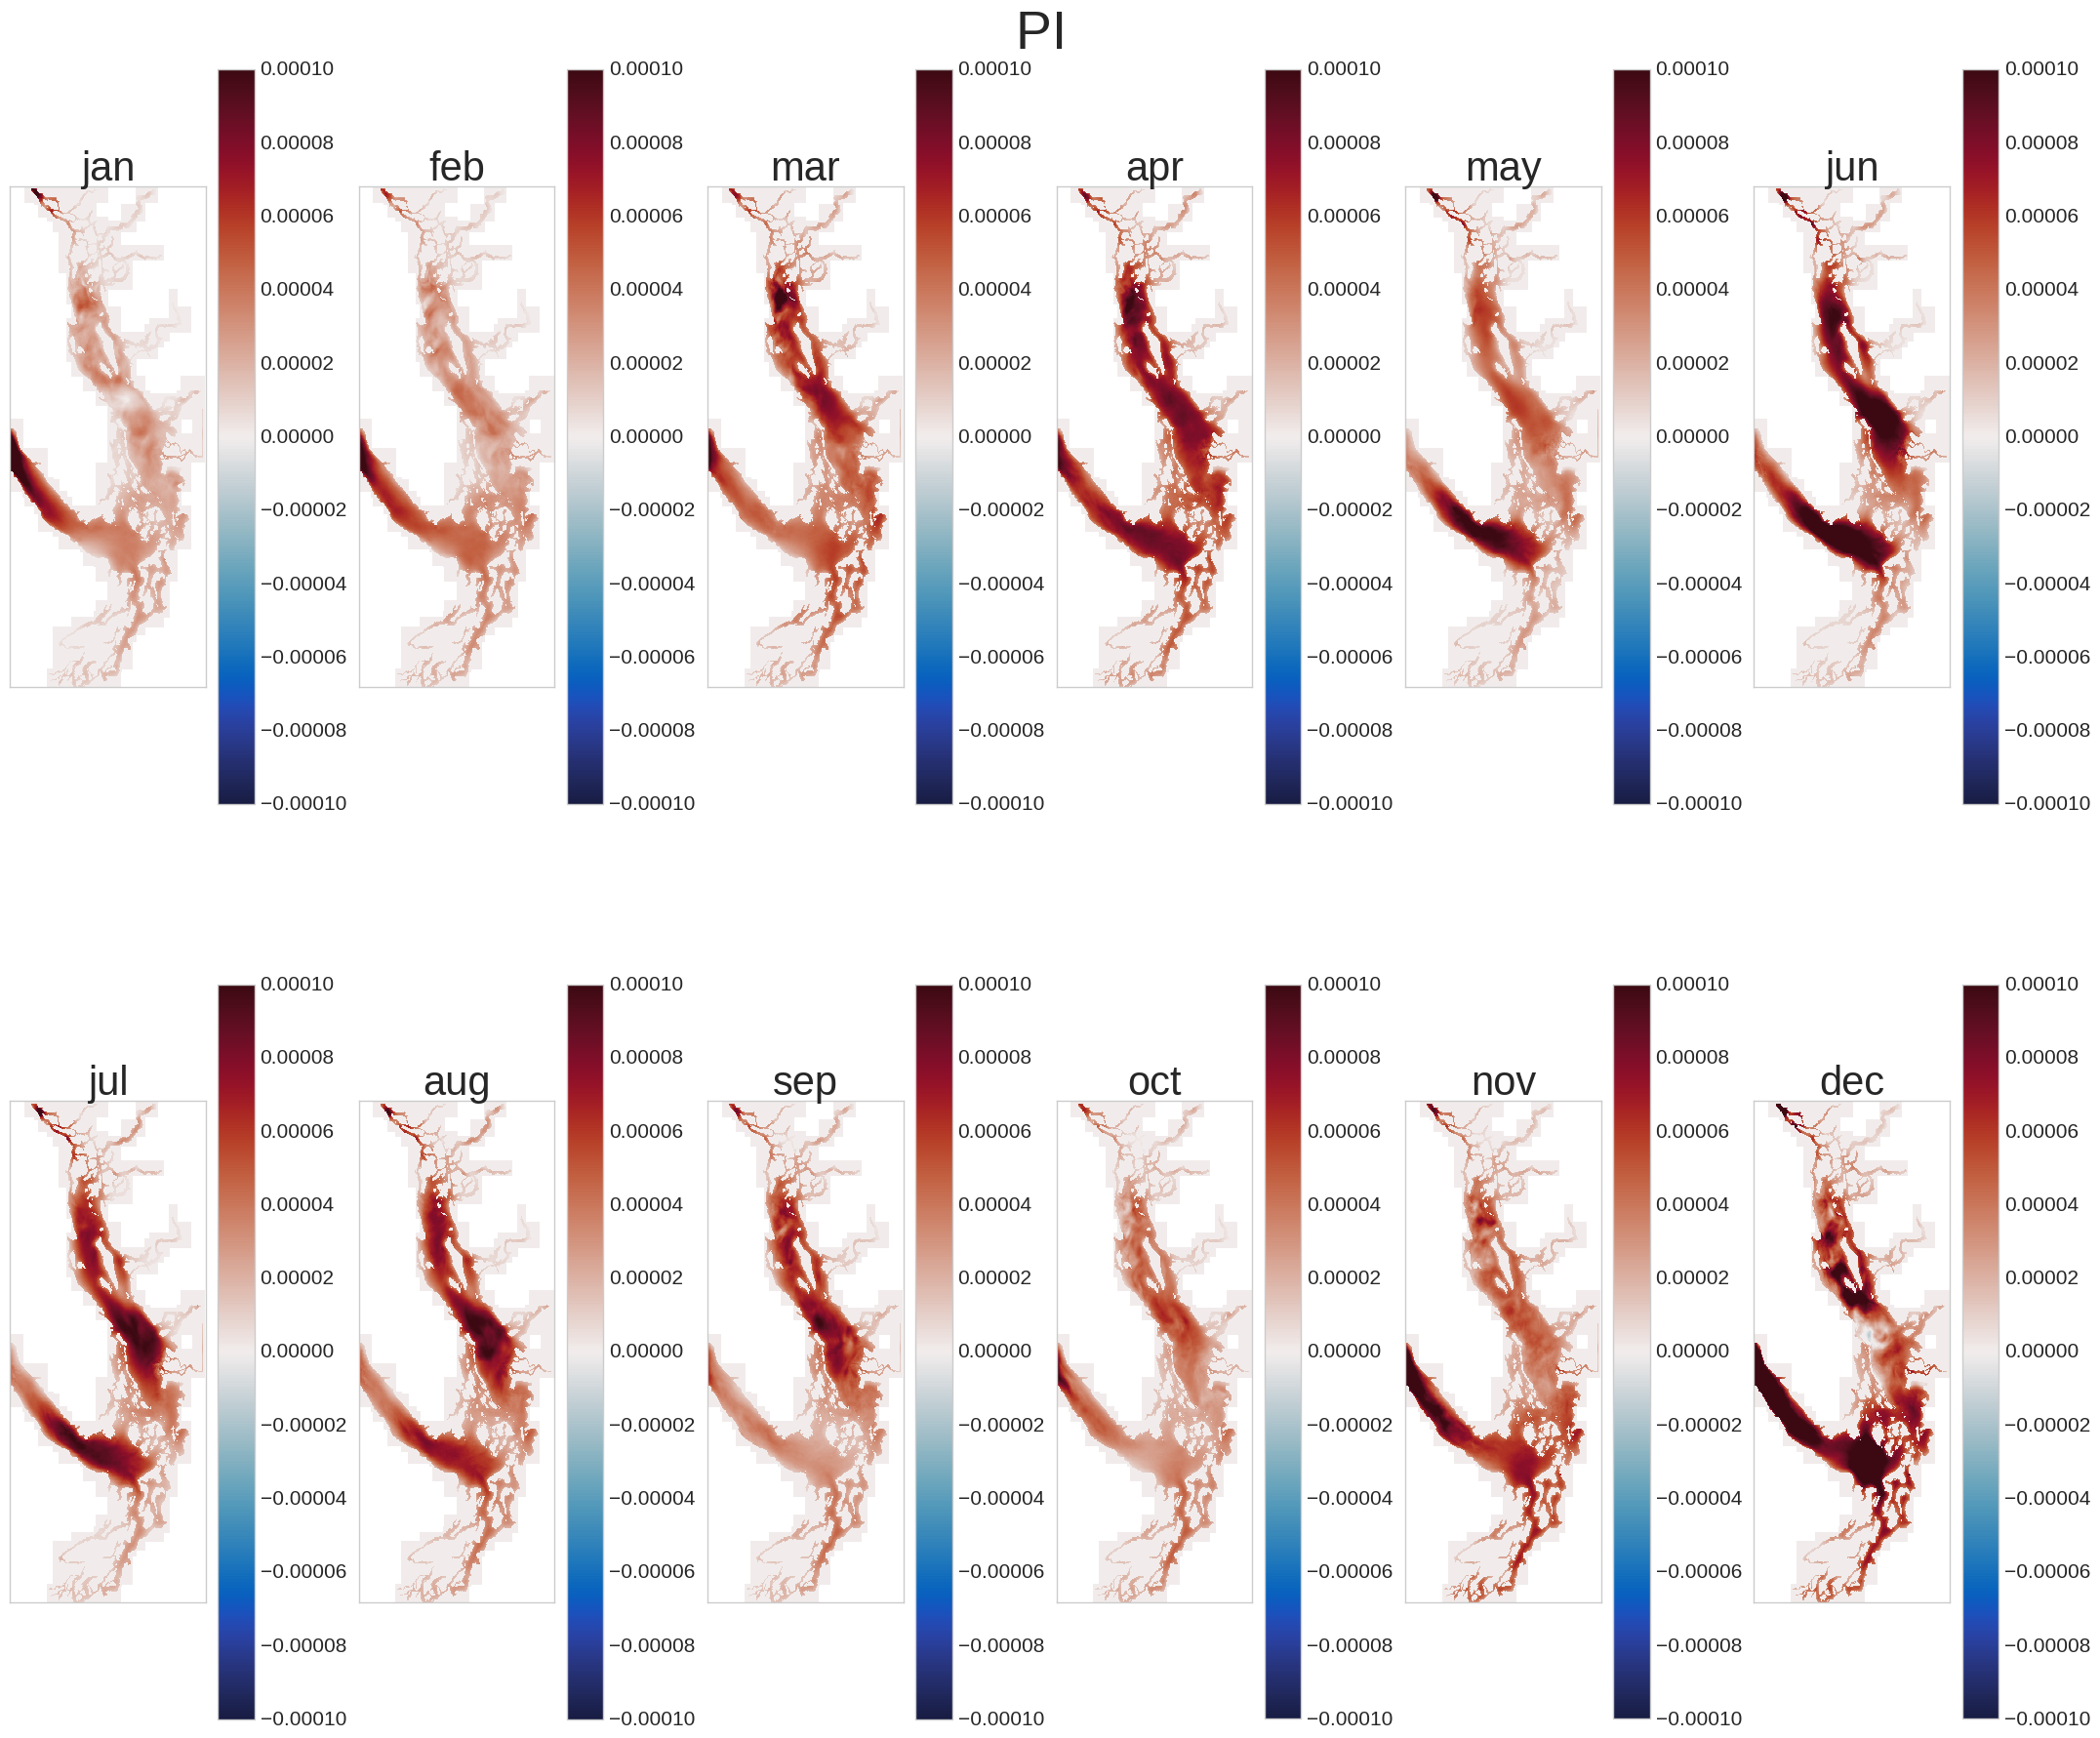

In [90]:
tvmin = -0.0001
tvmax = 0.0001
fig = plt.figure(figsize=(12*fact,10.5*fact))
for i in range(1,13):
    mon = mons[i-1]
    plotstr_PI = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'
    plotstr_BR = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/MONTHLY/SKOG_1m_2015{mon}_2015{mon}_carp_T.nc'

    tnc_BR =nc.Dataset(plotstr_BR)
    tnc_PI =nc.Dataset(plotstr_PI)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep
    BR_dat = tnc_BR['co2_flux_mmol_m2_s'][0,:,:]
    PI_dat = tnc_PI['co2_flux_mmol_m2_s'][0,:,:]
    tplt = BR_dat - PI_dat
    viz_tools.set_aspect(ax1)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.balance, vmin = tvmin, vmax = tvmax)
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    BR_dat[BR_dat == 0] = np.nan
    PI_dat[PI_dat == 0] = np.nan 
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)
plt.suptitle('PI ', fontsize =40)
plt.tight_layout()



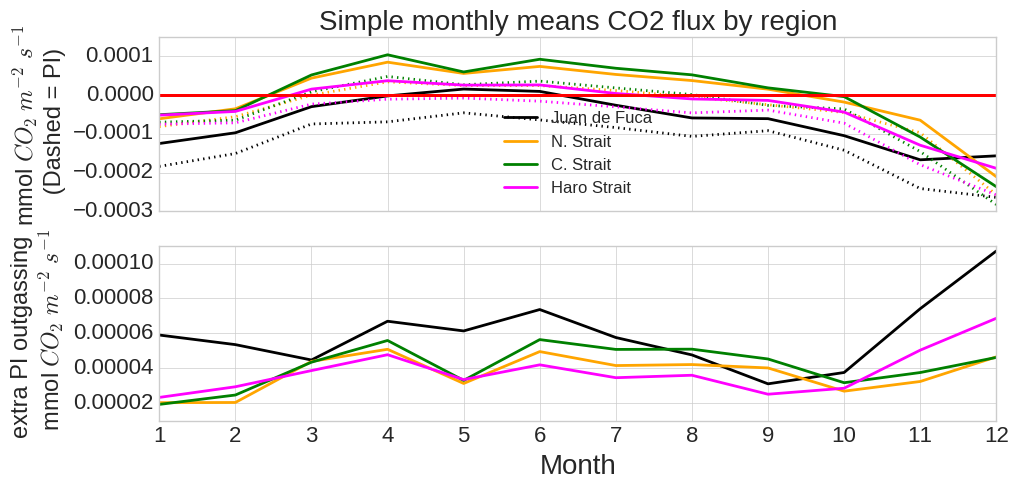

In [91]:
fact = 0.9
tmons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(2,1,1)
for r in range(0,4):
    ax1.plot(tmons, avgs_BR[r,:], linewidth = 2, color = colours[r], label = reg_names[r])
    ax1.plot(tmons, avgs_PI[r,:], linestyle = ':', \
             linewidth = 2, color = colours[r])
    ax1.plot(tmons, np.zeros_like(tmons), \
             linewidth = 2, color = 'red')
    ax1.set_xlim([1,12])
    
    ax1.set_xticklabels([])
    ax1.set_ylabel('mmol $CO_2$ $m^{-2}$ $s^{-1}$ \n (Dashed = PI)', fontsize = 17)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means CO2 flux by region', fontsize = 20)

ax2 = fig.add_subplot(2,1,2)
for r in range(0,4):
    ax2.set_xticks(np.arange(1,13,1))
    ax2.plot(tmons, avgs_BR[r,:]-avgs_PI[r,:], \
             linewidth = 2, color = colours[r], label = reg_names[r])
    ax2.set_xlim([1,12])
    ax2.set_xticks(np.arange(1,13,1))
    ax2.set_xlabel('Month', fontsize = 20)
    ax2.set_ylabel('extra PI outgassing \n mmol $CO_2$ $m^{-2}$ $s^{-1}$', fontsize = 17)
    
plt.tick_params(axis='both', which='major', labelsize=16)


In [92]:
print('test complete')

test complete
